## <font color=purple>Importing various libraries</font>

In [2]:
# Import modules
import pymysql
from scipy.stats import chisquare
import os
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale=1.5, color_codes=True)
pymysql.install_as_MySQLdb()
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from pandas import read_excel, merge

In [3]:
# Connecting to database 
db = MySQLdb.connect(host="mydb.itu.dk",    
                     user="cbdm",         
                     passwd="cbdm2020",  
                     db="dlimi_db",
                     charset='utf8'
                    )      
# Use all the SQL you like to create the first dataframe 
df2 = pd.read_sql("SELECT * FROM `2_Absence`", con=db)
df3 = pd.read_sql("SELECT * FROM `2_Education_Long`", con=db)
df4 = pd.read_sql("SELECT * FROM `2_Fraction_Blood_Clot`", con=db) 
df5 = pd.read_sql("SELECT * FROM `2_Life_Expectancy`", con=db) 
df6 = pd.read_sql("SELECT * FROM `2_Longterm_Disease`", con=db) 
df7 = pd.read_sql("SELECT * FROM `2_Morbidly_Obese`", con=db) 
df8 = pd.read_sql("SELECT * FROM `2_T2D`", con=db) 
df9 = pd.read_sql("SELECT * FROM `2_WHO_Minimum_Physical_Activity`", con=db) 

df10 = pd.read_sql("SELECT * FROM `2_Attention`", con=db) 
df11 = pd.read_sql("SELECT * FROM `2_Sales`", con=db) 

### <font color=brown>Cluster Exercise</font>


In [4]:
#i created a list of all dataframes instead of calling the database multiple times.
data_frames = [df2, df3, df4, df5, df6, df7, df8, df9]

In [5]:
#just to make sure that it works
df10.head(5)

,row_names,SITE_SHORT,PERIOD_ID,COUNT_,WHO_ATC_CODE,CATEGORY,BRICK_NAME,BRICK_NO
0,1,min,202006,1,A10AE04,New generation insulin in basal,Aabenraa,308
1,2,pro,202006,3,A10AE04,New generation insulin in basal,Aabenraa,308
2,3,min,202006,13,A10AE04,New generation insulin in basal,Aalborg City,502
3,4,pro,202006,26,A10AE04,New generation insulin in basal,Aalborg City,502
4,5,min,202006,17,A10AE04,New generation insulin in basal,Amager,102


## <font color=purple>I am merging the 10 dataframes to 1</font>

In [6]:
#Attention and sales dataframes are excluded since they do not have anything to merge on.

from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['brick_nr'],
                                            how='left'), data_frames)

# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['brick_nr'],
                                            how='left'), data_frames).fillna('void')

In [7]:
df_merged.head(5)

,row_names_x,brick_nr,brick_x,absence,row_names_y,brick_y,antal,brick_navn,population_x,value_per_1000,...,brick_y,fraction_y,row_names_x,brick_x,patients,population_y,patients_per_1000,row_names_y,brick_y,Andel
0,1,101,Bornholm,"6,2865",1,Bornholm,"6035,258672188186",Bornholm,33046,"182,6320484230523",...,Bornholm,"0,1755",1,Bornholm,"2248,978472",33046,"68,05599685",1,Bornholm,"0,302"
1,2,102,Amager,"5,747333333",2,Amager,"64810,874711589306",Amager,154254,"420,15684981646706",...,Amager,"0,130333333",2,Amager,"6136,772115",154254,"39,78355255",2,Amager,"0,24333333333333332"
2,3,103,Nørrebro/City,"5,4995",3,Nørrebro/City,"44280,90932139913",Nørrebro/City,88293,"501,5223100517496",...,Nørrebro/City,"0,1075",3,Nørrebro/City,"3019,148357",88293,"34,19465141",3,Nørrebro/City,"0,2215"
3,4,104,Vesterbro/Christianshavn,"5,58",4,Vesterbro/Christianshavn,"49553,41956356552",Vesterbro/Christianshavn,103052,"480,85839734857666",...,Vesterbro/Christianshavn,"0,1",4,Vesterbro/Christianshavn,"3387,602593",103052,"32,87274961",4,Vesterbro/Christianshavn,"0,225"
4,5,105,Frederiksberg,"5,5375",5,Frederiksberg,"52262,04744646349",Frederiksberg,105260,"496,5043458717793",...,Frederiksberg,"0,104",5,Frederiksberg,"3574,931136",105260,"33,96286468",5,Frederiksberg,"0,223"


In [8]:
df_merged.columns

Index(['row_names_x', 'brick_nr', 'brick_x', 'absence', 'row_names_y',
       'brick_y', 'antal', 'brick_navn', 'population_x', 'value_per_1000',
       'row_names_x', 'brick_x', 'Andel.med.blodprop.i.hjertet', 'row_names_y',
       'brick_y', 'year', 'row_names_x', 'brick_x', 'fraction_x',
       'row_names_y', 'brick_y', 'fraction_y', 'row_names_x', 'brick_x',
       'patients', 'population_y', 'patients_per_1000', 'row_names_y',
       'brick_y', 'Andel'],
      dtype='object')

In [9]:
#Drop columns vi ikke har brug for
df_merged.drop(['row_names_x','row_names_y','brick_y','brick_navn','brick_x', 'row_names_x','row_names_y', 'brick_y'],axis=1, inplace=True)

In [10]:
df_merged.columns

Index(['brick_nr', 'absence', 'antal', 'population_x', 'value_per_1000',
       'Andel.med.blodprop.i.hjertet', 'year', 'fraction_x', 'fraction_y',
       'patients', 'population_y', 'patients_per_1000', 'Andel'],
      dtype='object')

In [11]:
df_merged.head(5)

,brick_nr,absence,antal,population_x,value_per_1000,Andel.med.blodprop.i.hjertet,year,fraction_x,fraction_y,patients,population_y,patients_per_1000,Andel
0,101,"6,2865","6035,258672188186",33046,"182,6320484230523","0,0205","77,1905","0,4065","0,1755","2248,978472",33046,"68,05599685","0,302"
1,102,"5,747333333","64810,874711589306",154254,"420,15684981646706","0,009000000000000001","79,96766667","0,326666667","0,130333333","6136,772115",154254,"39,78355255","0,24333333333333332"
2,103,"5,4995","44280,90932139913",88293,"501,5223100517496","0,0075","79,283","0,305","0,1075","3019,148357",88293,"34,19465141","0,2215"
3,104,"5,58","49553,41956356552",103052,"480,85839734857666","0,008","80,05","0,3075","0,1","3387,602593",103052,"32,87274961","0,225"
4,105,"5,5375","52262,04744646349",105260,"496,5043458717793","0,008","79,6455","0,306","0,104","3574,931136",105260,"33,96286468","0,223"


In [12]:
# If the above cell does not work, you can export directly the table as a csv in the www.itu.dk/mysql repository, chose as format csv and export
# https://www.itu.dk/mysql/index.php?db=dlimi_db&table=1_Table_SKS_Diagnose_Hospital&target=sql.php&token=3420a9f8c95b9ef1855b9f117438a781
#df = pd.read_csv('./1_Table_SKS_Diagnose_Hospital.csv',header = None)

# the table comes without headers so add them, use 'Hospital Code' instead of 'Sygehuskode', this will come heandy later when we need to merge this dataframe to another
#df.columns = ['row_names', 'Aar','SKS','SKS_Kodetekst',	'Diagnose',	'Hospital Code','Sygehus',	'Unikke_Patienter',	'Registreringer']

In [13]:
#i am checking for NaN values - but there is none.
df_merged.isnull().values.any()
df_merged.isnull().sum().sum()

0

In [14]:
#convert all columns to same format, seperated by ',' and not '.'
data = df_merged.replace({',':'.'}, regex=True)

#det var ikke dette, der skulle til åbenbart. 
#Det må være selve objekterne, der skal ændres til int.

## <font color=purple>Converting all to int from floats/objects</font>

In [15]:
#Tjekker hvilke typer datasættet indeholder.

data.dtypes


brick_nr                         int64
absence                         object
antal                           object
population_x                     int64
value_per_1000                  object
Andel.med.blodprop.i.hjertet    object
year                            object
fraction_x                      object
fraction_y                      object
patients                        object
population_y                     int64
patients_per_1000               object
Andel                           object
dtype: object

In [16]:
#jeg konverterer nu objekterne til floats og derefter til int.

data['absence']=data['absence'].astype(float).astype('int64')
data['antal']=data['antal'].astype(float).astype('int64')
data['value_per_1000']=data['value_per_1000'].astype(float).astype('int64')
data['Andel.med.blodprop.i.hjertet']=data['Andel.med.blodprop.i.hjertet'].astype(float).astype('int64')
data['year']=data['year'].astype(float).astype('int64')
data['fraction_x']=data['fraction_x'].astype(float).astype('int64')
data['fraction_y']=data['fraction_y'].astype(float).astype('int64')
data['patients_per_1000']=data['patients_per_1000'].astype(float).astype('int64')
data['patients']=data['patients'].astype(float).astype('int64')
data['Andel']=data['Andel'].astype(float).astype('int64')

In [17]:
data.dtypes

brick_nr                        int64
absence                         int64
antal                           int64
population_x                    int64
value_per_1000                  int64
Andel.med.blodprop.i.hjertet    int64
year                            int64
fraction_x                      int64
fraction_y                      int64
patients                        int64
population_y                    int64
patients_per_1000               int64
Andel                           int64
dtype: object

<h1> 3: Visualisations


In [17]:
'''
I want to visualize how the morbidly obese and life expentancy look like separately.
I want to visualize if there is any relation between mobidly obese and life expentancy.'''

'\nI want to visualize how the morbidly obese and life expentancy look like separately.\nI want to visualize if there is any relation between mobidly obese and life expentancy.'

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c278ac290>,
      dtype=object)

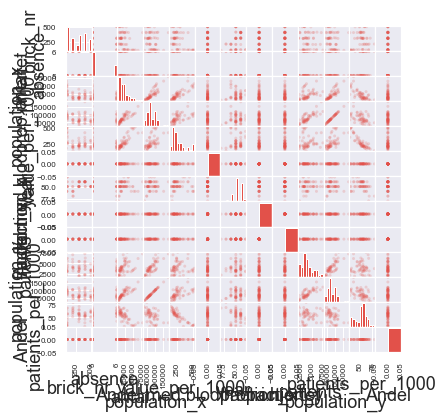

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6))

<h1/>clustering

In [15]:
# i will do the k means clustering on dataset 2 and using two different datasets

In [16]:
#df_bricks_nor = pd.read_csv("2_Bricks_z_normalized (2).csv", sep=";")

In [17]:
#df_bricks = pd.read_csv("2_Bricks (1).csv", sep=",")

In [18]:
#df_bricks_nor.head(4)

In [19]:
#df_bricks.head(5)

In [20]:
#merge the bricks columns

#df = merge(df_bricks_nor, df_bricks, on="brick_nr")

In [21]:
#df.tail()

In [22]:
#df.describe()

In [23]:
#checking for any missing values - none - which is good

#df.isnull().sum()

In [24]:
#df.drop_duplicates(inplace=True)

In [25]:
#df.head(5)

In [26]:
#usind only brick_nr and absence_x for easy visualisations

#D = df.iloc[:,[1,2]].values

In [27]:
#using the elbow method
#We already know the optimal number of clusters, however we could still benefit from determining it using the elbow method
#To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time

# Define in advance the KMeans arguments and use in the loop Python’s dictionary unpacking operator (**)

#kmeans_kwargs = {"init": "random",
#                 "n_init": 10,
#                 "max_iter": 300,
#                 "random_state": 42,
#                 }
#
## Loop to test differnt values for k
#sse = []
#for k in range(1, 11):
#    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
#    kmeans.fit(X)
#    sse.append(kmeans.inertia_)
#    
## Plotting    
#plt.style.use("fivethirtyeight")
#plt.plot(range(1, 11), sse)
#plt.xticks(range(1, 11))
#plt.xlabel("Number of Clusters")
#plt.ylabel("SSE")
#plt.show()




## <font color=purple>Prøver cluster på dataframe "dataset"</font>

In [28]:
dataset = data.sort_index(axis=0)

In [29]:
dataset.head(5)

,brick_nr,absence,antal,population_x,value_per_1000,Andel.med.blodprop.i.hjertet,year,fraction_x,fraction_y,patients,population_y,patients_per_1000,Andel
0,101,6,6035,33046,182,0,77,0,0,2248,33046,68,0
1,102,5,64810,154254,420,0,79,0,0,6136,154254,39,0
2,103,5,44280,88293,501,0,79,0,0,3019,88293,34,0
3,104,5,49553,103052,480,0,80,0,0,3387,103052,32,0
4,105,5,52262,105260,496,0,79,0,0,3574,105260,33,0


In [30]:
dataset.isnull().sum()

brick_nr                        0
absence                         0
antal                           0
population_x                    0
value_per_1000                  0
Andel.med.blodprop.i.hjertet    0
year                            0
fraction_x                      0
fraction_y                      0
patients                        0
population_y                    0
patients_per_1000               0
Andel                           0
dtype: int64

In [31]:
#i want to visualize on brick_nr and antal

X = dataset.iloc[:,[2,3]].values

In [32]:
#dropping duplicates

dataset.drop_duplicates(inplace=True)



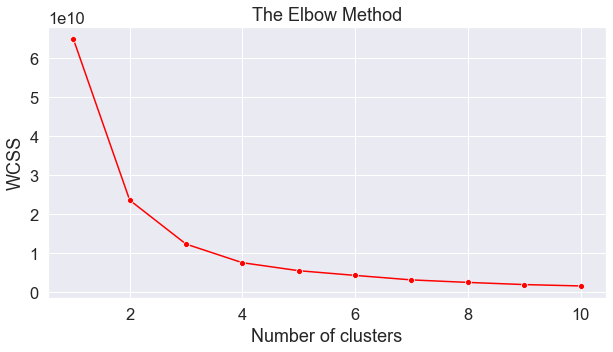

In [33]:
#using the elbow method

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# Plotting    
#plt.style.use("fivethirtyeight")
#plt.plot(range(1, 11), wcss)
#plt.xticks(range(1, 11))
#plt.xlabel("Number of Clusters")
#plt.ylabel("WCSS")
#plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

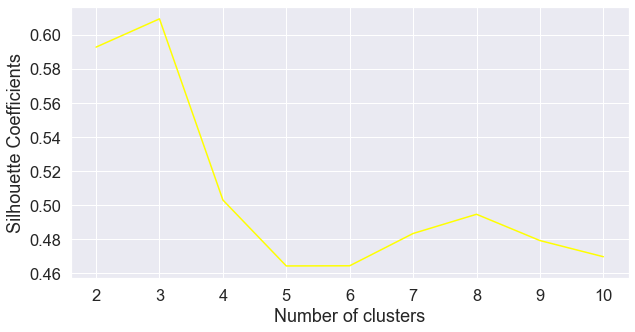

In [35]:
# The silhouette coefficient is a measure of cluster cohesion and separation. 
# It quantifies how well a data point fits into its assigned cluster based on two factors:

# - How close the data point is to other points in the cluster
# - How far away the data point is from points in other clusters
# Silhouette coefficient values range between -1 and 1. 
# Larger numbers indicate that samples are closer to their clusters than they are to other clusters


silhouette_coefficients = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    
    #inertia method returns wcss for that model
    silhouette_coefficients.append(score)

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), silhouette_coefficients, color='yellow')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()

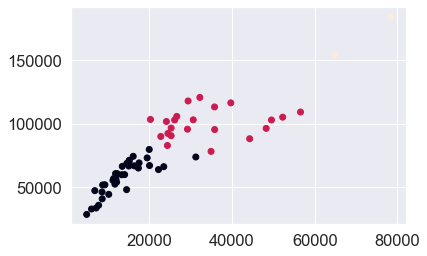

In [36]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Compute the silhouette scores for kmeans algorithm
kmeans_silhouette= silhouette_score(X, kmeans.labels_).round()

# Check how well the kmeans labels fit to the data
plt.scatter(X[:,0], X[:,1],c = kmeans.labels_)

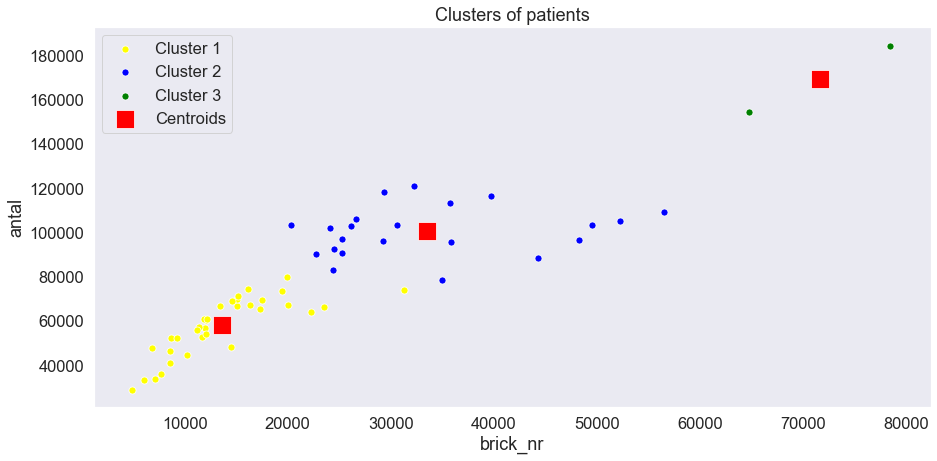

In [37]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of patients')
plt.xlabel('brick_nr')
plt.ylabel('antal')
plt.legend()
plt.show()

## <font color=purple>Factor Analysis: Bartletts test and Kaiser-Meyer</font>

In [38]:
#VIRKER IKKE, HJÆLP
#Bartlett’s test

# Bartlett’s test of sphericity checks whether or not the observed variables 
# intercorrelate at all using the observed correlation matrix against the identity matrix. 
# If the test found statistically insignificant, you should not employ a factor analysis

#chi_square_value,p_value=calculate_bartlett_sphericity(dataset)
#chi_square_value, p_value

In [39]:
# Kaiser-Meyer-Olkin (KMO) Test

# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# NB! Value of KMO less than 0.6 is considered inadequate.

#kmo_all,kmo_model=calculate_kmo(data)
#kmo_model

## <font color=purple>Choosing the number of factors</font>

In [40]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer(25, rotation=None) #Change the 25 depending om number of factors in data
#fa.fit(df)
#
## Check Eigenvalues
#ev, v = fa.get_eigenvalues()
#ev

In [41]:
# Create scree plot using matplotlib
#plt.scatter(range(1,df.shape[1]+1),ev)
#plt.plot(range(1,df.shape[1]+1),ev)
#plt.title('Scree Plot')
#plt.xlabel('Factors')
#plt.ylabel('Eigenvalue')
#plt.grid()
#plt.show()

In [42]:
## <font color=purple>Performing Factor Analysis</font>

In [43]:
#fa = FactorAnalyzer(6, rotation="varimax")
#fa.fit(df)
#fa.loadings_

In [44]:
# Get variance of each factors
#fa.get_factor_variance()

<h1>3: To use KNN, I need to import dataset 2 which has categorical values - K-nearest neighbor modelling (KNN)

In [45]:
path = '1_Table_SKS_Diagnose_Hospital_merged (1).csv'
data1 = pd.read_csv(path, sep=',')

In [46]:
data1.head()

,Unnamed: 0,row_names,Aar,SKS,SKS_Kodetekst,Diagnose,Hospital Code,Sygehus,Unikke_Patienter,Registreringer,Hospital,Region
0,0,1,2018,BABZ0,Anl¾ggelse Af Kateter Til Regionalan¾stesi,DI702A,8001,Aalborg Universitetshospital,7.0,12,Aalborg Universitetshospital,Nordjylland
1,1,2,2018,BABZ0,Anl¾ggelse Af Kateter Til Regionalan¾stesi,DM890,8001,Aalborg Universitetshospital,3.0,5,Aalborg Universitetshospital,Nordjylland
2,2,3,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC153,6620,Aarhus Universitetshospital,4.0,7,Aarhus Universitetshospital,Midtjylland
3,3,4,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC154,6620,Aarhus Universitetshospital,9.0,11,Aarhus Universitetshospital,Midtjylland
4,4,5,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC155,6620,Aarhus Universitetshospital,11.0,11,Aarhus Universitetshospital,Midtjylland


### Check again the structure of the new merged dataframe


In [47]:
data1.head()
data1.shape
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751535 entries, 0 to 751534
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        751535 non-null  int64  
 1   row_names         751535 non-null  int64  
 2   Aar               751535 non-null  int64  
 3   SKS               751535 non-null  object 
 4   SKS_Kodetekst     751535 non-null  object 
 5   Diagnose          751535 non-null  object 
 6   Hospital Code     751535 non-null  int64  
 7   Sygehus           751535 non-null  object 
 8   Unikke_Patienter  751535 non-null  float64
 9   Registreringer    751535 non-null  int64  
 10  Hospital          751535 non-null  object 
 11  Region            751535 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 68.8+ MB


### lets see at how complete the data is


In [48]:
data1.isnull().sum()

#no missing values

Unnamed: 0          0
row_names           0
Aar                 0
SKS                 0
SKS_Kodetekst       0
Diagnose            0
Hospital Code       0
Sygehus             0
Unikke_Patienter    0
Registreringer      0
Hospital            0
Region              0
dtype: int64

In [49]:
data1.head(5)

,Unnamed: 0,row_names,Aar,SKS,SKS_Kodetekst,Diagnose,Hospital Code,Sygehus,Unikke_Patienter,Registreringer,Hospital,Region
0,0,1,2018,BABZ0,Anl¾ggelse Af Kateter Til Regionalan¾stesi,DI702A,8001,Aalborg Universitetshospital,7.0,12,Aalborg Universitetshospital,Nordjylland
1,1,2,2018,BABZ0,Anl¾ggelse Af Kateter Til Regionalan¾stesi,DM890,8001,Aalborg Universitetshospital,3.0,5,Aalborg Universitetshospital,Nordjylland
2,2,3,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC153,6620,Aarhus Universitetshospital,4.0,7,Aarhus Universitetshospital,Midtjylland
3,3,4,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC154,6620,Aarhus Universitetshospital,9.0,11,Aarhus Universitetshospital,Midtjylland
4,4,5,2018,BABZ00,Anl¾ggelse Af Epiduralkateter,DC155,6620,Aarhus Universitetshospital,11.0,11,Aarhus Universitetshospital,Midtjylland


In [50]:
# Check how many unique identifiers we have for the 'Hospital Code'
data1['Hospital Code'].unique().shape

(27,)

In [51]:
# Check how many unique identifiers we have for the 'Region'
data1['Region'].unique().shape

(5,)

In [52]:
# Drop also columns we no longer need. Note: play with this list, check what happens to the accuracy of our predictions if we plog in or out different features
data1.drop(['row_names', 'SKS_Kodetekst', 'Sygehus',
           'Hospital', 'Hospital Code'],
          axis=1, inplace=True)

In [53]:
data1.head(5)

,Unnamed: 0,Aar,SKS,Diagnose,Unikke_Patienter,Registreringer,Region
0,0,2018,BABZ0,DI702A,7.0,12,Nordjylland
1,1,2018,BABZ0,DM890,3.0,5,Nordjylland
2,2,2018,BABZ00,DC153,4.0,7,Midtjylland
3,3,2018,BABZ00,DC154,9.0,11,Midtjylland
4,4,2018,BABZ00,DC155,11.0,11,Midtjylland


In [54]:
# The dataframe is large, these dimensions don't allow us to work through the exercise quickly (we want to try different model configurations)
# We subset our dataframe and extract 10000 random rows from it
data_subset = data1.sample(n=10000)

In [55]:
#we need to seperate the region label column from the dataset
X=data_subset.drop(columns=['Region'])
Y=data_subset['Region']

In [56]:
# We need to deal with categorical variables
X = pd.get_dummies(X)

# Check shape of X
X.shape

(10000, 4721)

<h1>3: K-nearest neighbor modelling (KNN)

In [57]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=20)

In [58]:
# KNN works based on distance between data points, its important that we standardize the data before training the model. 
# Standardization helps in avoiding problems due to scale.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[-0.97778839,  0.40920489, -0.26320868, ..., -0.01195314,
         0.        , -0.0169055 ],
       [-0.6199671 ,  0.40920489, -0.23974726, ..., -0.01195314,
         0.        , -0.0169055 ],
       [-0.96903475,  0.40920489, -0.16936299, ..., -0.01195314,
         0.        , -0.0169055 ],
       ...,
       [ 0.12271207,  0.40920489, -0.22801655, ..., -0.01195314,
         0.        , -0.0169055 ],
       [ 0.3062814 ,  0.40920489,  0.53447972, ..., -0.01195314,
         0.        , -0.0169055 ],
       [-0.13733546,  0.40920489,  0.06525125, ..., -0.01195314,
         0.        , -0.0169055 ]])

In [59]:
# Train the KNN model using a random K value, say K=5
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
# Check how well our trained model perform in predicting the labels of the cross validation data
pred=KNN_model.predict(X_val)
print("Accuracy={}%".format((sum(y_val==pred)/y_val.shape[0])*100))

Accuracy=58.599999999999994%


In [61]:
# Check if this accuracy can be improved by tuning the hyper parameter K for its optimal value.
# In code below, for each K value the model performance is evaluated using the F1-Score. 
# F1-Score is a performance metric used for evaluating the model. Value of F1-Score is in range 0–1. 
# The model performance increases with increase in F1-Score

from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)
    f=f1_score(y_val,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

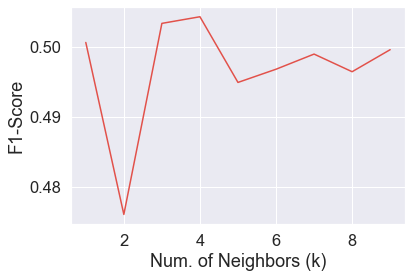

In [62]:
# plot results
plt.plot(k_list,f1_list)
plt.xlabel('Num. of Neighbors (k)')
plt.ylabel('F1-Score')
plt.show()

In [63]:
# Get the best K value that gives the maximum F1-Score
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 4  with F1-Score= 0.5042504071611551


In [64]:
# Now use the best_k calculated above in the next prediction and see if the accuracy improves
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_val)
print("Accuracy={}%".format((sum(y_val==pred)/y_val.shape[0])*100))

Accuracy=58.96666666666667%


In [ ]:
#it did a little bit.

<h1>3: Workshop predictions - K-nearest neighbor modelling (KNN)